## Introduction:
<br>
<p>The RMS Titanic was a luxury steamship and ship sank in April 15, 1912. In this disaster more. than 1500 people lost their lives from total 2240 people. Out of 126, 59 children aged under 14 sadly died. However, there were 53.4% survival rate shown on titanic facts article (titanicfacts.net, n.d.). In this project my goal is to predict which passengers survived the Titanic shipwreck using suitable machine learning model. I have taken dataset from Kaggle website (kaggle, n.d.). Based on training dataset the survival rate is 38.4%. I have decided to build decision tree model to predict survived passengers. I am using CART (Classification and Regression Trees) technique to build Decision Tree model.</p> 


## Load Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Description of features:
PassengerId: Id of each passanger 
<br> Survived: The status of passanger survived or not. here 0 = not survived, 1 = survived
<br> Pclass: Class of passanger based on socio-economic status. here, 1 = Upper, 2 = Middle, 3 = Lower
<br> Name: Name of passanger
<br> Sex: Gender of passanger. values: male and female.
<br> Age: age of passanger
<br> SibSp: number of siblings or spouses aboard the Titanic
<br> Parch: number of parents or children aboard the Titanic
<br> Ticket: Ticket number
<br> Fare: fare of passanger
<br> Cabin: Cabin number
<br> Embarked: port to board a ship. Here C = Cherbourg, Q = Queenstown, S = Southampton

## Data Exploaration:

In [2]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Check If there is any null values

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [4]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
# titanic_test.count()

<b>Check If we have any douplicates

In [6]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
titanic.drop_duplicates(keep = False, inplace = True) 

<li> We can see that Age, Cabin and Embarked features have missing value. Handling missing value is very important, because our main purpose is to predict accurate results. Let's see if we have any dependency on missing values. 
<li>If I remove the missing values then as we can see cabin column has 687 missing values and it is huge data. It might possible that the people who don't have cabin are the crew members.
<li> Before we remove any missing values, I want to check correlation between the variables to understand dependancy of variables for target feature known as 'Survived'.

## Data Cleaning 

<b> Replace Sex values from string to integer. male = 1 and female = 0 

In [8]:
titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [9]:
titanic = titanic.rename(columns={"Sex": "Gender"})

<b>Convert categorical values into the numeric values

In [10]:
titanic["Gender"].replace({"male": 1, "female": 0}, inplace=True)

<b>replace null vaues in  Cabin feature as 0.

In [11]:
titanic["Cabin"].fillna("0", inplace = True) # Nan might be crew, so we can convert them = 0

<b>Extract prefixes from name column and convert them into relevant prefixes, so that we can apply binning process on 'Age' continuous feature 

In [12]:
# titanic.Age.unique()

In [13]:
#Extract the initial of names
titanic['Prefix']=0
for i in titanic:
    titanic['Prefix']=titanic.Name.str.extract('([A-Za-z]+)\.') 

In [14]:
pd.crosstab(titanic.Prefix,titanic.Gender).T.style.background_gradient(cmap='Blues')

Prefix,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Gender,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
1,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


We can see there are almost 16 prefixes, we can replace Mlle, Mme, Rev, Johkheer, Don, Countess into common prefix like Mrs., Miss, Mr and boy.

<br>Here Mr = Capt, Dr, Major, Jankeer, Don, Col, Rev, Mr
<br>Mrs = Countess, Lady
<br>Miss = Mlle, Mme, Ms
<br>Master = Boy

In [15]:
titanic['Prefix'] = titanic['Prefix'].replace(['Mlle', 'Mme', 'Ms'], 'Miss')
titanic['Prefix'] = titanic['Prefix'].replace(['Lady', 'Countess'], 'Mrs')
titanic['Prefix'] = titanic['Prefix'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Rev', 'Major', 'Sir'], 'Mr')
titanic['Prefix'] = titanic['Prefix'].replace('Master', 'Boy')

In [16]:
pd.crosstab(titanic.Prefix,titanic.Gender).T.style.background_gradient(cmap='Blues')

Prefix,Boy,Miss,Mr,Mrs
Gender,,,,
0,0,186,1,127
1,40,0,537,0


<b> Now lets calcuate the mean of Age based on Prefix column.

In [17]:
age_mean = titanic.groupby('Prefix')['Age'].mean()
age_mean

Prefix
Boy      4.574167
Miss    21.860000
Mr      33.022727
Mrs     35.981818
Name: Age, dtype: float64

<b> Replace all null values in Age field using mean age of Prefix

In [18]:
titanic.loc[(titanic.Age.isnull())&(titanic.Prefix=='Boy'),'Age']= 4.5
titanic.loc[(titanic.Age.isnull())&(titanic.Prefix=='Miss'),'Age']=21.8
titanic.loc[(titanic.Age.isnull())&(titanic.Prefix=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Prefix=='Mrs'),'Age']=36

In [19]:
titanic['Prefix'] = titanic['Prefix'].replace('Miss', 1)
titanic['Prefix'] = titanic['Prefix'].replace('Mrs', 2) 
titanic['Prefix'] = titanic['Prefix'].replace('Mr', 3) 
titanic['Prefix'] = titanic['Prefix'].replace('Boy', 4) 

In [20]:
titanic["Embarked"].fillna("0", inplace = True)

In [21]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Prefix         0
dtype: int64

<b>Replace Embarked values like s = 1, C = 2 and Q = 3

In [22]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', '0'], dtype=object)

In [23]:
titanic['Embarked'] = titanic['Embarked'].replace('S', 1)
titanic['Embarked'] = titanic['Embarked'].replace('C', 2)
titanic['Embarked'] = titanic['Embarked'].replace('Q', 3)
titanic["Embarked"].fillna(4, inplace = True)

In [24]:
titanic = titanic.astype({"Embarked":'int32'})

In [25]:
titanic = titanic.drop(['Name'], axis=1)

In [26]:
titanic = titanic.drop(['Cabin'], axis=1)

In [27]:
titanic = titanic.drop(['Ticket'], axis=1)

<b>remove the outliers

(array([ 58.,  46., 213., 169., 255.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

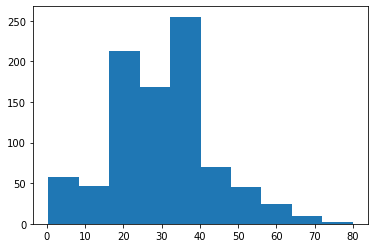

In [28]:
# check if there are any outliers

plt.hist(titanic.Age)

<b>As we can see, I have handled all null values in age field, so that we can calcuate accuate results

#### <font color='gray'>Binning process for Train Dataset and Test dataset</font>

<b>Now we don't know the missing age of passangers and we cannot replace it with 0. Because if we replace with the 0 then it will come under bin = 0 age, which will give us bias results. Therefore to avoid this issue, we can check other column to identify the age of passanger. 

In [29]:
# titanic.loc[ titanic['Age'] <= 16, 'Age'] = 1
# titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 2
# titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 3
# titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 4
# titanic.loc[ titanic['Age'] > 64, 'Age'] = 5
# titanic.Age.unique()

In [30]:
# titanic.loc[ titanic['Fare'] <= 7.91, 'Fare']  = 1
# titanic.loc[(titanic['Fare'] > 7.91) & (titanic['Fare'] <= 14.454), 'Fare'] = 2
# titanic.loc[(titanic['Fare'] > 14.454) & (titanic['Fare'] <= 31), 'Fare']   = 3
# titanic.loc[ titanic['Fare'] > 31, 'Fare'] = 4

In [31]:
titanic

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Prefix
0,1,0,3,1,22.0,1,0,7.2500,1,3
1,2,1,1,0,38.0,1,0,71.2833,2,2
2,3,1,3,0,26.0,0,0,7.9250,1,1
3,4,1,1,0,35.0,1,0,53.1000,1,2
4,5,0,3,1,35.0,0,0,8.0500,1,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1,3
887,888,1,1,0,19.0,0,0,30.0000,1,1
888,889,0,3,0,21.8,1,2,23.4500,1,1
889,890,1,1,1,26.0,0,0,30.0000,2,3


## Data Visualization

<b>Passanger Survived based Class

In [32]:
titanic1 = titanic.loc[titanic['Survived'] == 1] 

titanic2 = (titanic.groupby('Pclass')['Survived'].count()).sort_values(ascending = False)
print(titanic2)

titanic3 = titanic['Pclass'].unique()

Pclass
3    491
1    216
2    184
Name: Survived, dtype: int64


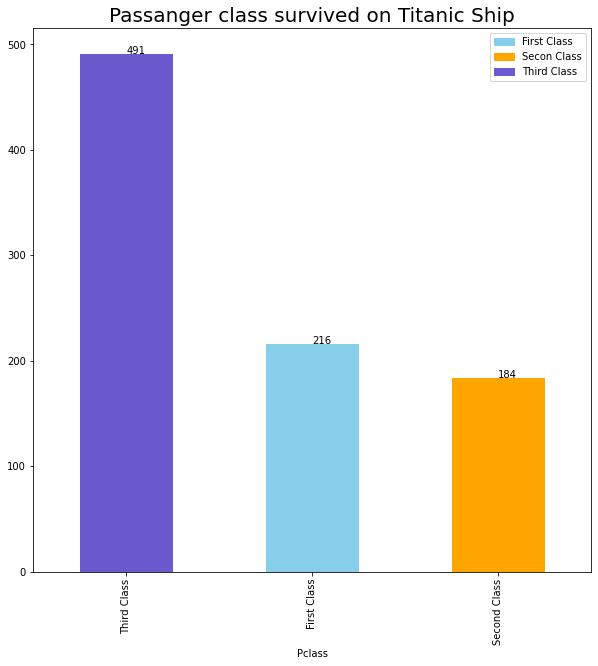

In [33]:
plt.title('Passanger class survived on Titanic Ship', 
          fontsize= 20)

titanic2.plot(kind = 'bar', figsize=(10,10), color=['slateblue', 'skyblue', 'orange'])

colors = {'First Class':'skyblue', 'Secon Class': 'orange', 'Third Class':'slateblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks([0,1,2], ["Third Class", "First Class", "Second Class"])

y = [491, 216, 184]
for i, v in enumerate(y):
    plt.text(i, v + 0.01, str(v))

<b> Percentage of passanger survived and died on Titanic Ship

Survived
0    549
1    342
Name: Survived, dtype: int64


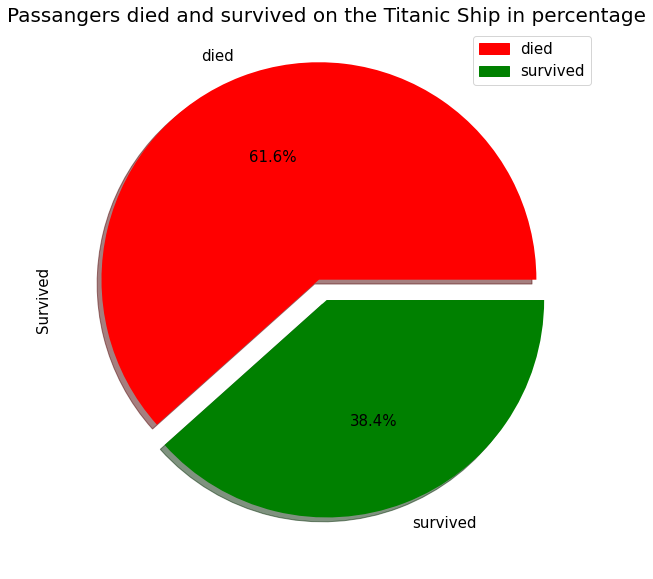

In [34]:
titanics1 = titanic.loc[titanic['Survived']] # survived = 1, died = 0
titanics = (titanics1.groupby('Survived')['Survived'].count()).sort_values(ascending = False)
print(titanics)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

plt.title('Passangers died and survived on the Titanic Ship in percentage', 
          fontsize= 20)

gender = ['died', 'survived']
titanics.plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0), 
                    autopct = '%1.1f%%',labels = gender, colors = ['red', 'green'], fontsize= 15);

colors = {'died': 'red', 'survived':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='upper right')

<b>total Male vs Female on Titanic Cruise in percentage

In [35]:
titanic['Gender'].value_counts() # 1 = male, 0 = female

1    577
0    314
Name: Gender, dtype: int64

In [36]:
titanic11 = titanic.loc[titanic['Gender']] 

titanic22 = (titanic11.groupby('Survived')['Gender'].count()).sort_values(ascending = False)

titanic33 = titanic['Gender'].unique()

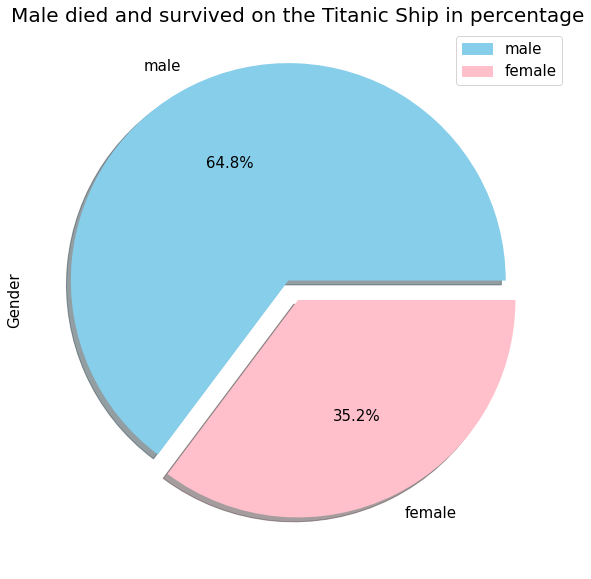

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

plt.title('Male died and survived on the Titanic Ship in percentage', 
          fontsize= 20)

gender = ['male', 'female']
titanic22.plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0), 
                    autopct = '%1.1f%%',labels = gender, colors = ['skyblue', 'pink'], fontsize= 15);

colors = {'male':'skyblue', 'female': 'pink'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='upper right')


<b>Male died and survived on Titanic Ship

In [38]:
titanic31 = titanic.loc[titanic['Gender'] == 1] #male = 1

titanic32 = (titanic31.groupby('Survived')['Gender'].count()).sort_values(ascending = False)
print(titanic32)

titanic33 = titanic['Gender'].unique()

Survived
0    468
1    109
Name: Gender, dtype: int64


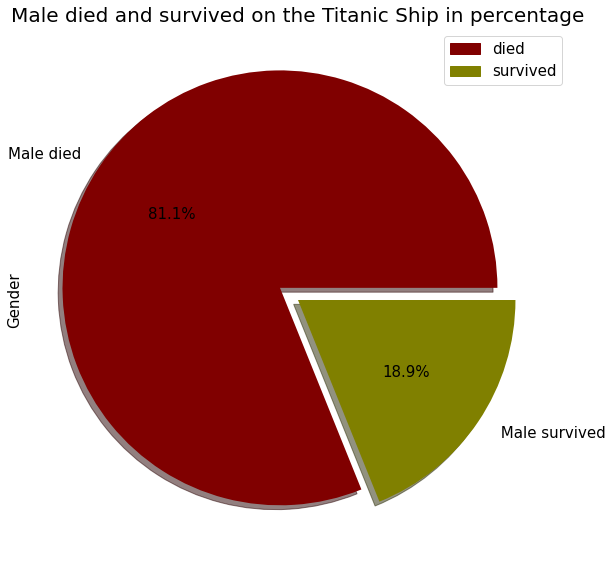

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

plt.title('Male died and survived on the Titanic Ship in percentage', 
          fontsize= 20)

gender = ['Male died', ' Male survived']
titanic32.plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0), 
                    autopct = '%1.1f%%',labels = gender, colors = ['maroon', 'olive'], fontsize= 15);

colors = {'died':'maroon', 'survived': 'olive'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='upper right')

<b>Female died and survived on the Titanic Ship

In [40]:
titanic41 = titanic.loc[titanic['Gender'] == 0] #female = 1

titanic42 = (titanic41.groupby('Survived')['Gender'].count()).sort_values(ascending = False)
print(titanic42)

titanic43 = titanic['Gender'].unique()

Survived
1    233
0     81
Name: Gender, dtype: int64


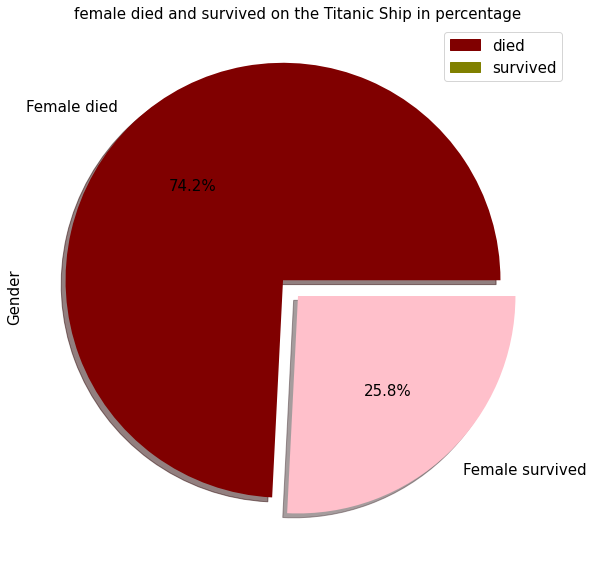

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

plt.title('female died and survived on the Titanic Ship in percentage', 
          fontsize= 15)

gender = ['Female died', 'Female survived']
titanic42.plot(kind = 'pie', figsize=(15,10), shadow = True, explode = (0.1, 0), 
                    autopct = '%1.1f%%',labels = gender, colors = ['maroon', 'pink'], fontsize= 15);

colors = {'died':'maroon', 'survived': 'olive'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc='upper right')

Text(0.5, 1.0, 'People survived, who were with their family and those who was single')

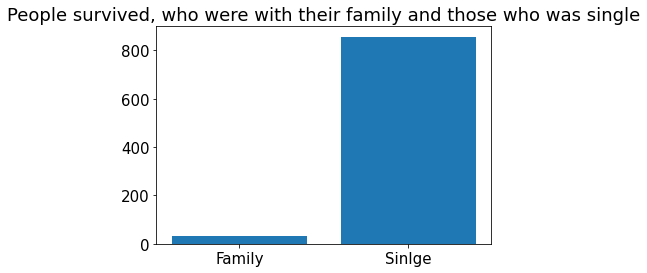

In [42]:
# people with the family and survived
family = titanic[(titanic['Survived'] == 1) & (titanic['SibSp'] == 1) & (titanic['Parch'] == 1)]['PassengerId'].count()

# people who was single on titanic survived
single = titanic['PassengerId'].count() - family
plt.bar(['Family', 'Sinlge'], [family, single])
plt.title("People survived, who were with their family and those who was single")

#### Correlation between variables

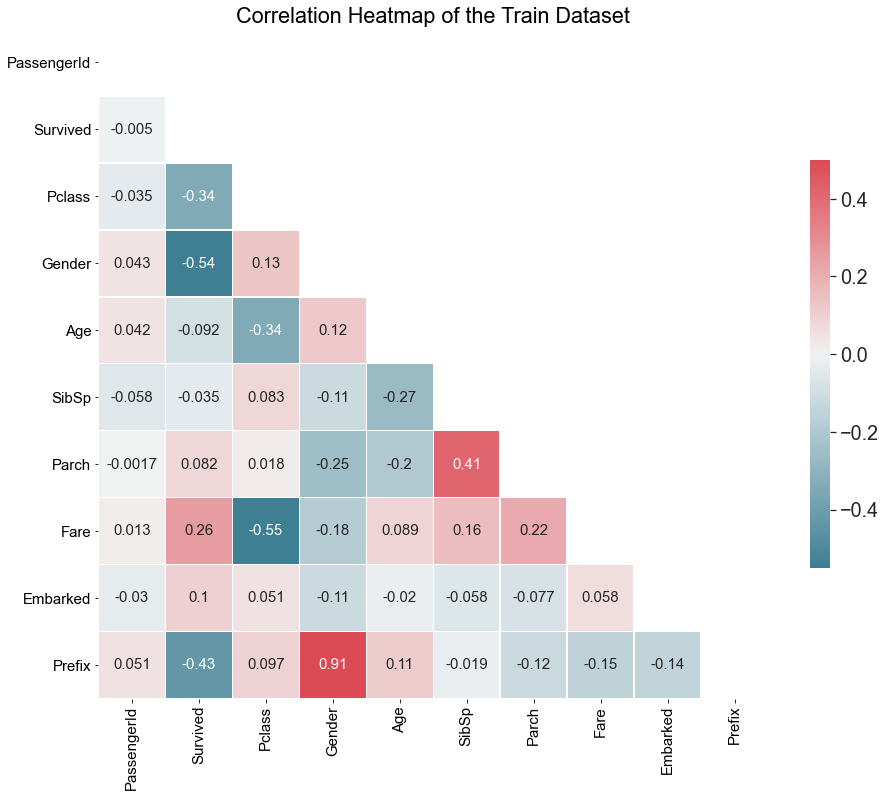

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = titanic.corr()

# upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))

sns.set(font_scale=1.8)

# Generate a custom diverging colourmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr, mask=mask, cmap=cmap, vmax=.5, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5},
    annot=True, annot_kws={"fontsize":15}
)
sns.set(font_scale=1.8)
ax.set_title('Correlation Heatmap of the Train Dataset')

plt.show()


<b>Move Target feature at the end of columns.

In [44]:
titanic = titanic[['PassengerId', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Prefix', 'Survived']]

In [45]:
titanic

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Prefix,Survived
0,1,3,1,22.0,1,0,7.2500,1,3,0
1,2,1,0,38.0,1,0,71.2833,2,2,1
2,3,3,0,26.0,0,0,7.9250,1,1,1
3,4,1,0,35.0,1,0,53.1000,1,2,1
4,5,3,1,35.0,0,0,8.0500,1,3,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,1,3,0
887,888,1,0,19.0,0,0,30.0000,1,1,1
888,889,3,0,21.8,1,2,23.4500,1,1,0
889,890,1,1,26.0,0,0,30.0000,2,3,1


## Build Model - Decision Tree

In [50]:
# before we start spliting dataset into train and test, we need to shuffle it well.
titanic = titanic.sample(frac = 1)

# convert it into the list format, because we are not using predefined libraries to split the data
titanic_list_train = titanic.values.tolist()

<b>Split the data into traning and testing set manually without using any libraries

In [51]:
titanic_train = titanic_list_train[0:712]
titanic_test = titanic_list_train[712:891]

In [52]:
#check if feature is numeric value or not
def is_numeric_val(data):
    
    # return if value is integer or float, it means variable contains numeric data
    return isinstance(data, float) or isinstance(data, int)

#return the labels 
def label_count(data):
    cnt = {}
    for row in data:
        # row[-1] means the last row of that perticular column
        label = row[-1]  
        
        if label not in cnt:
            cnt[label] = 0
        cnt[label] += 1
        
    return cnt

# count how many distict values in the feature
def distinct_values(rows, columns):
    
    # set always return distinct list values. Therefore we have userd set here
    return set([row[column] for row in rows]) 

In [53]:
# which question should we ask in the root node?
class Ask_Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value
    
    def match(self, instance):
        value = instance[self.column]
        
        if is_numeric_val(value):
            return value >= self.value
        else:
            return value == self.value

In [54]:
#partition of tree (answer the question)

def partition_data(data, ask_question):
    true, false = [], []
    for row in data:
        if ask_question.match(row):
            true.append(row)
        else:
            false.append(row)
    return true, false

<b>Calculate the impurity</b>
    <li>Impurity is the error in our dataset. We have to resude impurity of our dataset for good results.
    <li><b>Formula:</b>
        <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Gini Impurity = 1 - sum(P^2) 
        <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;here, p^2 = squared probability of feature

In [55]:
def gini_impurity(data):
    count_vals = label_count(data)
    imp = 1
    
    for label in count_vals:
        probability = count_vals[label] / float(len(data))
        imp = imp - probability**2
    
    return imp

<b>Calculate the Information Gain

In [56]:
def IG(l_node, r_node, feature_impurity):
    probability = (len(l_node))/ (len(l_node) + len(r_node))
    #return the impurity of root node, then left node and right node (it's called reminder)
    return feature_impurity - (probability*gini_impurity(l_node) - (1 - probability)*gini_impurity(r_node))

<b>Find best split</b>
    <br>Best split is dependent on information gain. If the information gain is greater then it will become a root node.
    <br>Once we find the root node, we have to devide our dataset into two category. It could be true and False, or many be Yes or No. (Mostly we divide data into the binary format)

In [57]:
#Split the nodes based on Information Gain
def split_data(data):
    
    feature_impurity = gini_impurity(data)
    question = None
    gain_info = 0
    
    
    # starts from 0 therfore there is nothing in last position
    n_features = len(data[0]) - 1 
    
    # Calculate the information gain of each feature
    for column in range(n_features):
        values = set([row[column] for row in data])
        
        #split data into true and false rows
        for value in values:
            ask_Q = Ask_Question(column, value)
            true, false = partition_data(data, ask_Q)
            
            if len(true) == 0 or len(false) == 0:
                continue
                
            information_gain = IG(true, false, feature_impurity)
            
            # after calculating Information gain, compare the IG of each feature and check which 
            # feature has maximumn informantion gain
            if information_gain >= gain_info:
                gain_info, question = information_gain, ask_Q 
    
    # the feature with the maximum information gain should choose to ask the question in the root node
    return gain_info, question

<b>Now Create Leaf Node

In [58]:
class Leaf_Node:
    def __init__(self, data):
        self.predict = label_count(data)

<b>Create Decision Node

In [59]:
class Decision_Node:
    def __init__(self, ask_question, b_true, b_flase):
        self.ask_question = ask_question
        self.b_true = b_true
        self.b_flase = b_flase
        

<b>Finally we have to create a decision tree

In [60]:
def decision_tree(data):
    gain_info, question = split_data(data)
    
    if gain_info == 0:
        return Leaf_Node(data)
    
    true_r, false_r = partition_data(data, question)
    
    true_split = decision_tree(true_r)
    false_split = decision_tree(false_r)
    
    return Decision_Node(question, true_split, false_split)

<b>Build fit method to train the data

In [61]:
def fit(data, node):
    if isinstance(node, Leaf_Node):
        return node.predict
    
    if node.ask_question.match(data):
        return fit(data, node.b_true)
    else:
        return fit(data, node.b_flase)

In [62]:
tree = decision_tree(titanic_train)

<b>Lets test the data

Take any random row to check if that person has survived or not?

In [63]:
#remove last column known as survived for test data, because it is target variable
predicted_survived_or_not = titanic_test[1:2][0][0:-1]
predicted_survived_or_not

[287.0, 3.0, 1.0, 30.0, 0.0, 0.0, 9.5, 1.0, 3.0]

<b>fit the data and calculate the decision_tree() and calculate the results. So the below results shows that person on that perticular row has been survived

In below results we can see that the person on 2nd th row will not survive as per model's prediction

In [64]:
fit(predicted_survived_or_not, tree)

{1.0: 1}

## Evaluation of Model

In [65]:
count = 0

actual_arr = []
precticted_arr = []
for data in titanic_test:
    # last column of predicted data - labeled data
    predicted = list(fit(data[0:-1], tree).keys())[0]
    
    # las column of the actual data
    actual_data = data[-1]
    
    if predicted == actual_data:
        count = count + 1
        
    actual_arr = np.append(actual_arr, actual_data)
    precticted_arr = np.append(precticted_arr, predicted)
    
    
    # check if original data matches with the predicted data and then calculate the accuracy score
    #print("Original data {} and predicted data: {}".format(actual_data, predicted))
 
# Calculate the accuracy score
accuracy = count/len(titanic_test)*100
print("Accuary of model is ", round(accuracy, 2))


Accuary of model is  86.03


In [66]:
import numpy
a = numpy.asarray(precticted_arr)
numpy.savetxt("new_pred.csv", a, delimiter=",")

<b> Above I have only created one dicision tree and I got accuracy score 86.03. I can create many decision tree and combine them to calcuate accuracy score then it will give me a good accuracy score. Combinition of multiple dicision trees are known as "Random Forest". Accuray score is also dependent on train and test dataset spliting amount. I have splited them into 80% train and 20% test dataset.

## Confusion Matrix

We can check the performance of classification model using confusion matrix on the test dataset. 
<li>True Positive (TP): In this case the model predicts 1 and actual value is also 1. It means passenger survived on Titanic Cruise.
<li>True Negative (TN): Here, the model predicts 0, and actual value is 0. So, we have predicted that passenger didn’t survived, which is similar to the actual value. 
<li>False Positive (FP): The model predicts 1, but actual value is 0, which means we have predicted that the passenger survived on Titanic Cruise, but in actual he/she didn’t survive.
<li>False Negative (FN): The model predicts 0, but actual value is 1. It means we have predicted passenger not survived, but in real he/she survived.


In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix(actual_arr, precticted_arr)

array([[92, 12],
       [13, 62]])

We can see that decision tree model has 92 true positive, 13 False Negative, 12 False Positive and 62 True Negative. So, decision tree model predicted 25 wrong out of 179 records in test data.